# Data Visualization with `ggplot2`

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# list of all geoms
ls(pattern = '^geom_', env = as.environment('package:ggplot2'))

[1] "geom_abline"            "geom_area"              "geom_bar"              
 [4] "geom_bin_2d"            "geom_bin2d"             "geom_blank"            
 [7] "geom_boxplot"           "geom_col"               "geom_contour"          
[10] "geom_contour_filled"    "geom_count"             "geom_crossbar"         
[13] "geom_curve"             "geom_density"           "geom_density_2d"       
[16] "geom_density_2d_filled" "geom_density2d"         "geom_density2d_filled" 
[19] "geom_dotplot"           "geom_errorbar"          "geom_errorbarh"        
[22] "geom_freqpoly"          "geom_function"          "geom_hex"              
[25] "geom_histogram"         "geom_hline"             "geom_jitter"           
[28] "geom_label"             "geom_line"              "geom_linerange"        
[31] "geom_map"               "geom_path"              "geom_point"            
[34] "geom_pointrange"        "geom_polygon"           "geom_qq"               
[37] "geom_qq_line"           "geom_quantile"          "geom_raster"           
[40] "geom_rect"              "geom_ribbon"            "geom_rug"              
[43] "geom_segment"           "geom_sf"                "geom_sf_label"         
[46] "geom_sf_text"           "geom_smooth"            "geom_spoke"            
[49] "geom_step"              "geom_text"              "geom_tile"             
[52] "geom_violin"            "geom_vline"

### Scatter Plots

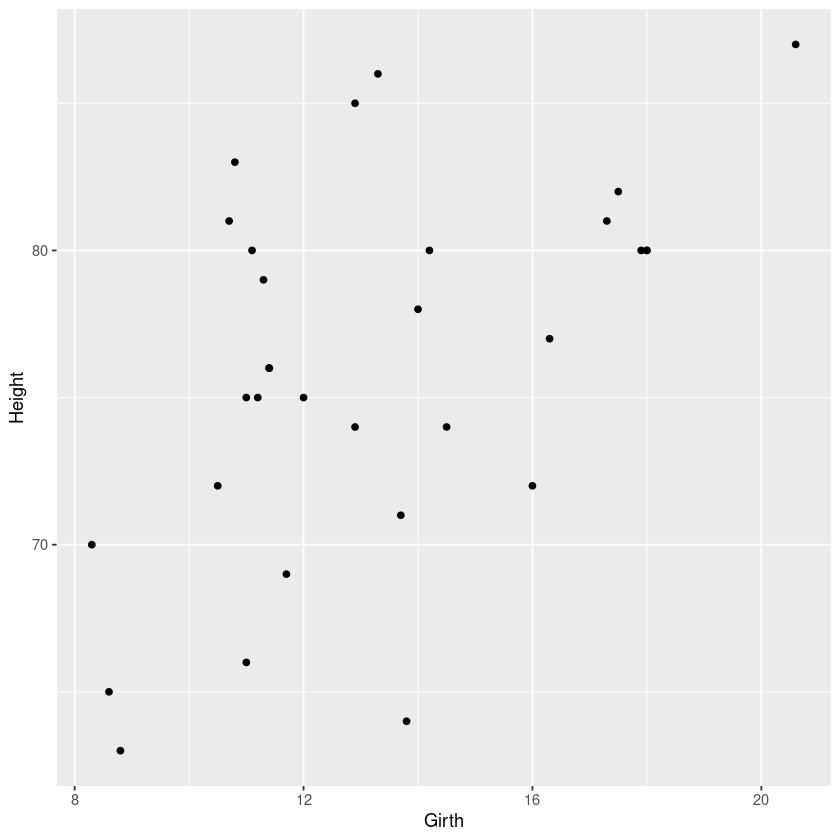

In [3]:
# basic scatterplot
## geom_point() gives us the scatter plot
ggplot(trees, aes(x=Girth, y=Height)) + 
    geom_point()

### Bar Plots

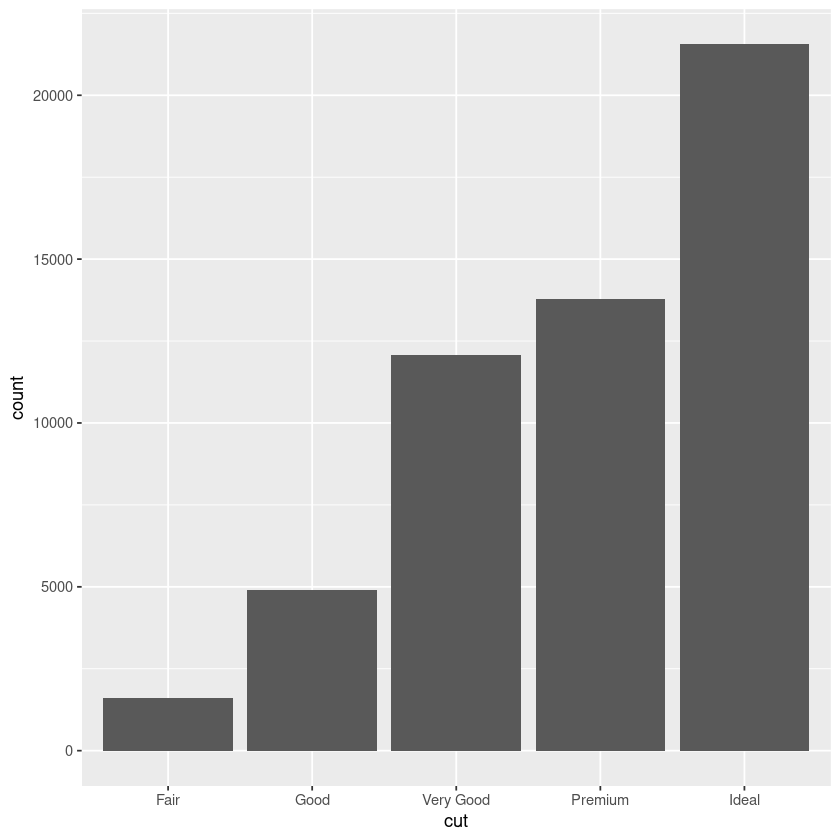

In [4]:
# basic bar plot
## prices of over 50,000 round cut diamonds

ggplot(diamonds, aes(cut)) +
    geom_bar()

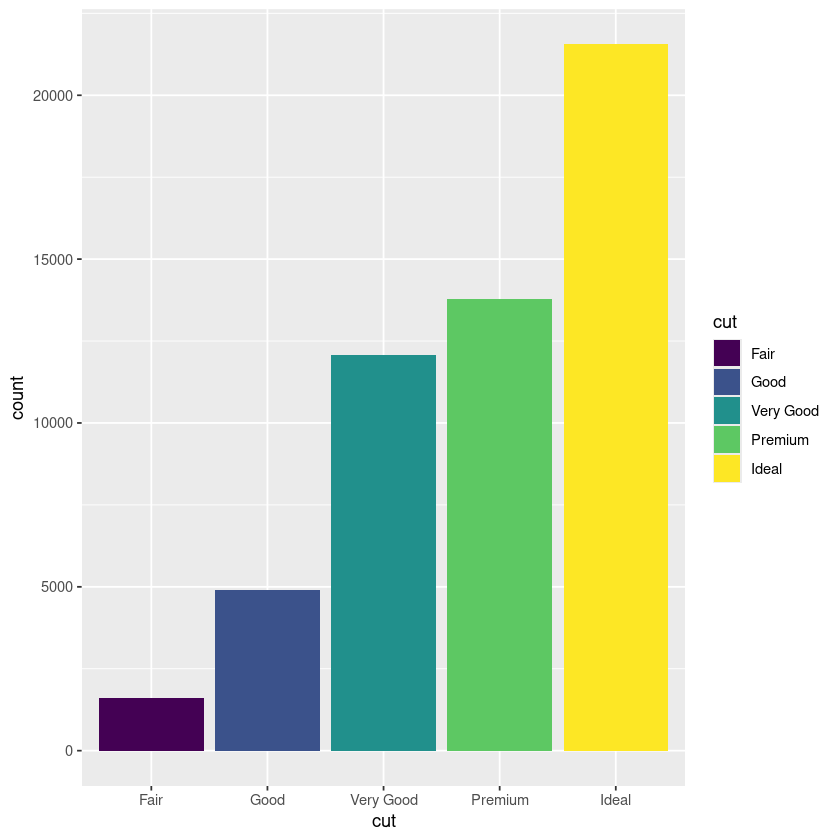

In [5]:
# color coding

ggplot(diamonds, aes(x = cut, fill= cut)) +
    geom_bar()

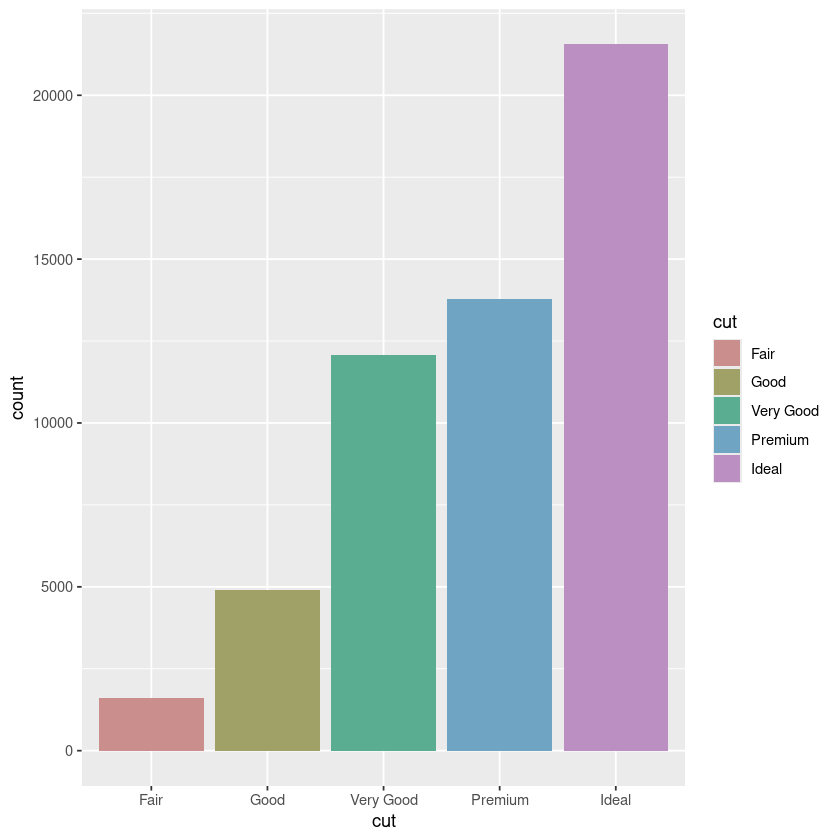

In [6]:
# lots of flexibility in coloring
# playing with hues; `c` argument is for chroma (intensity of color)
# theme - can control axes, background, and legends

ggplot(diamonds, aes(x = cut, fill = cut)) +
    geom_bar() + scale_fill_hue(c=40) #+ theme(legend.position="none")

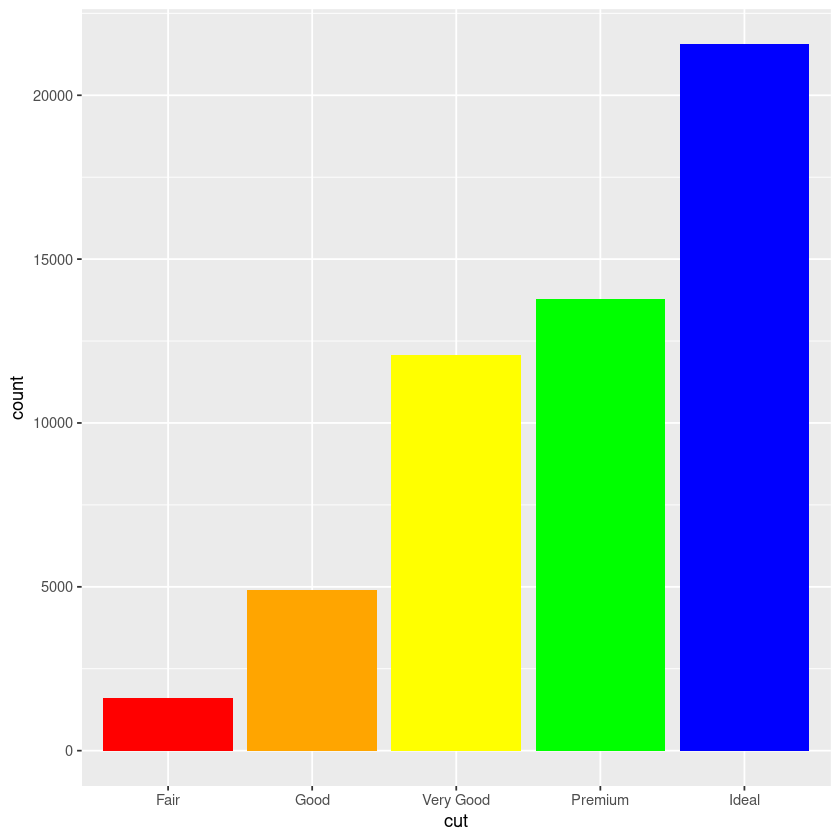

In [7]:
ggplot(diamonds, aes(x = cut, fill = cut)) +
    geom_bar() + scale_fill_manual(values = c("red", "orange", "yellow", "green", "blue")) + 
    theme(legend.position="none")

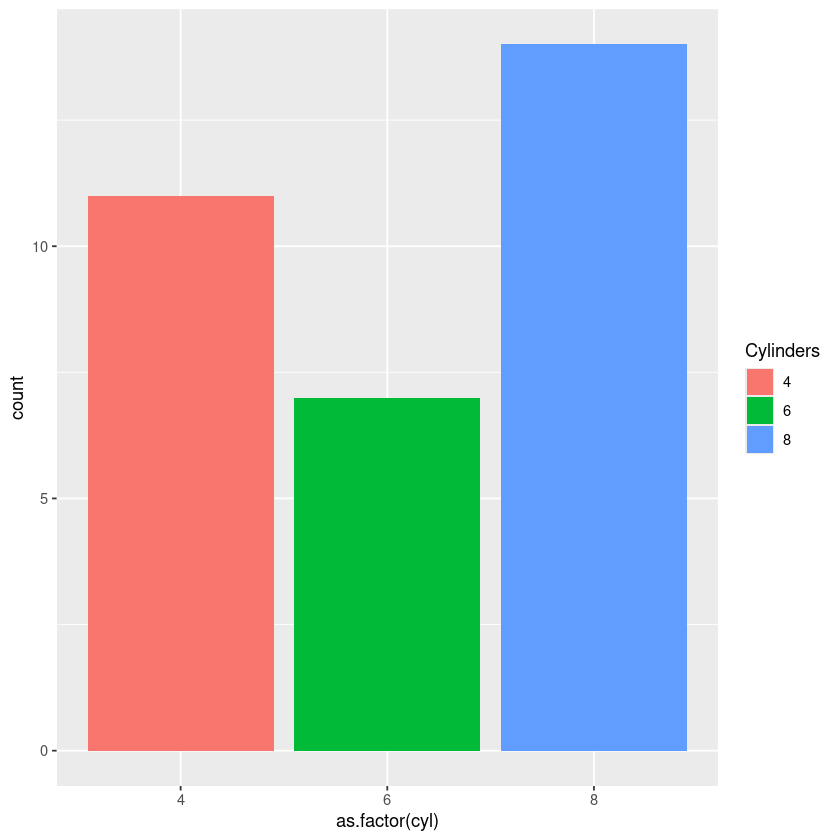

In [8]:
# can also turn numerical values into categorical data by using `as.factor`

ggplot(mtcars, aes(x=as.factor(cyl), fill = as.factor(cyl))) +
    geom_bar() + labs(fill = "Cylinders") # 'labs' is used to change legend title

### Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


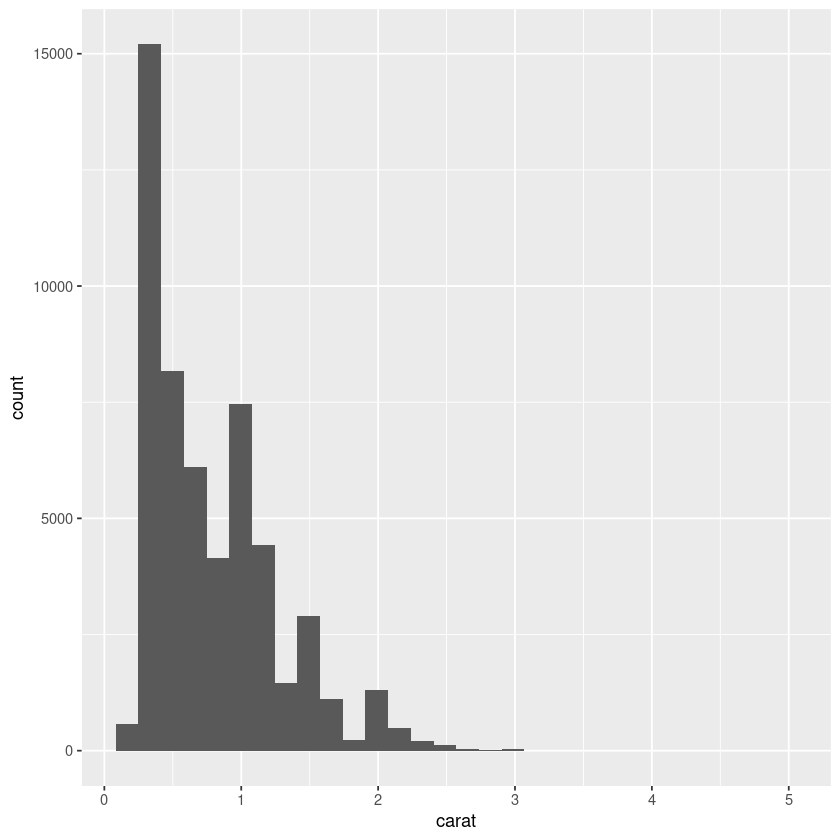

In [9]:
# basic histogram
## prices of over 50,000 round cut diamonds
ggplot(diamonds, aes(carat)) +
     geom_histogram()

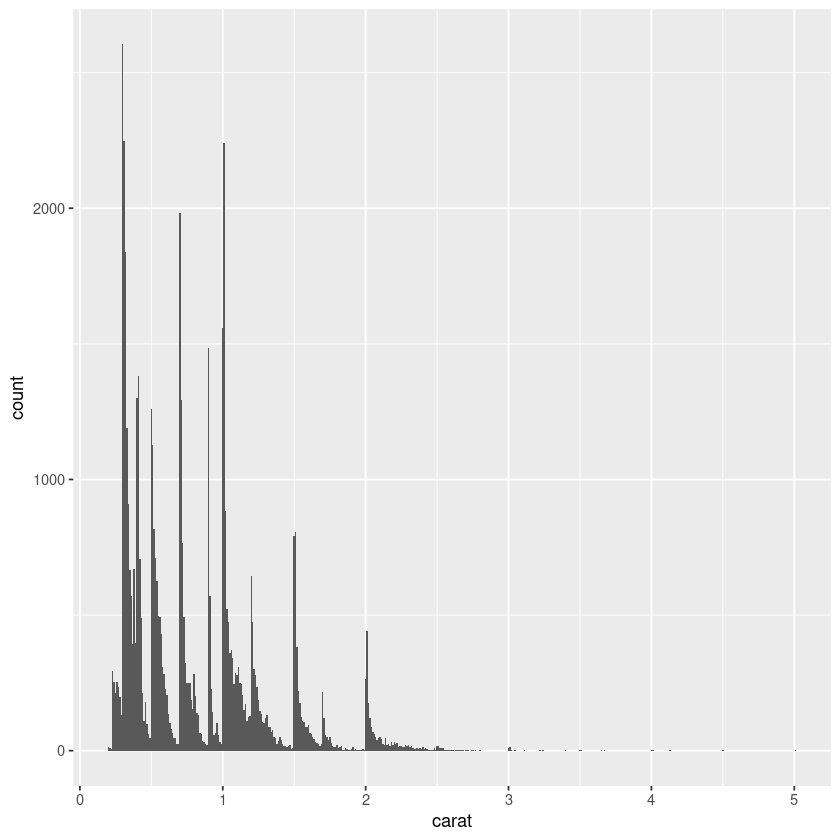

In [10]:
# play around with the binwidth to see how it affects the plots

ggplot(diamonds, aes(carat)) +
     geom_histogram(binwidth = 0.01)

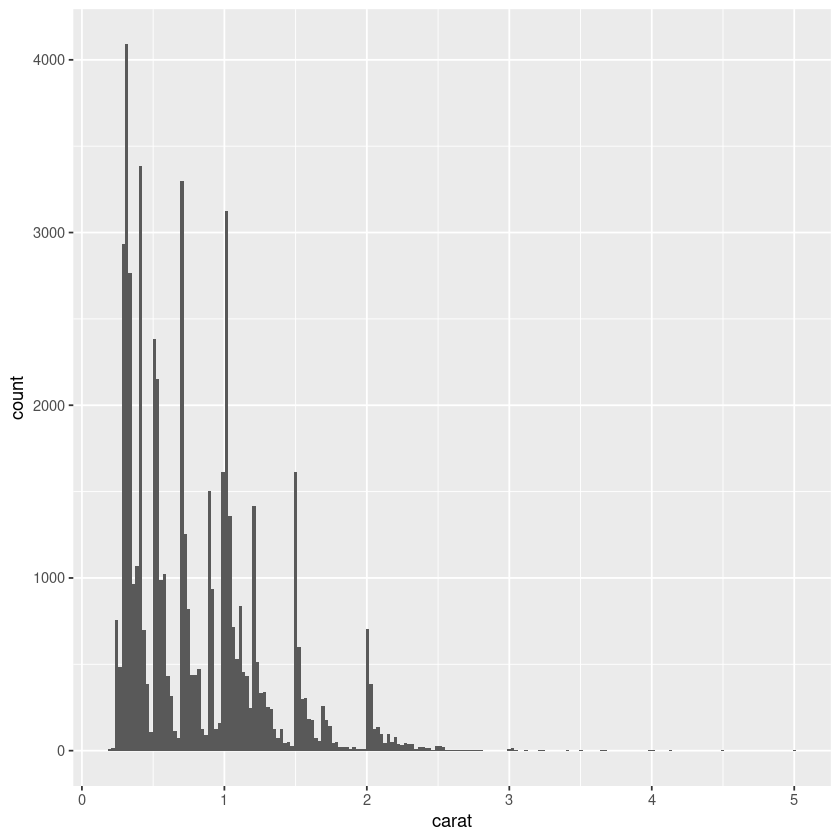

In [11]:
# changing number of bins directly

ggplot(diamonds, aes(carat)) +
     geom_histogram(bins = 200)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


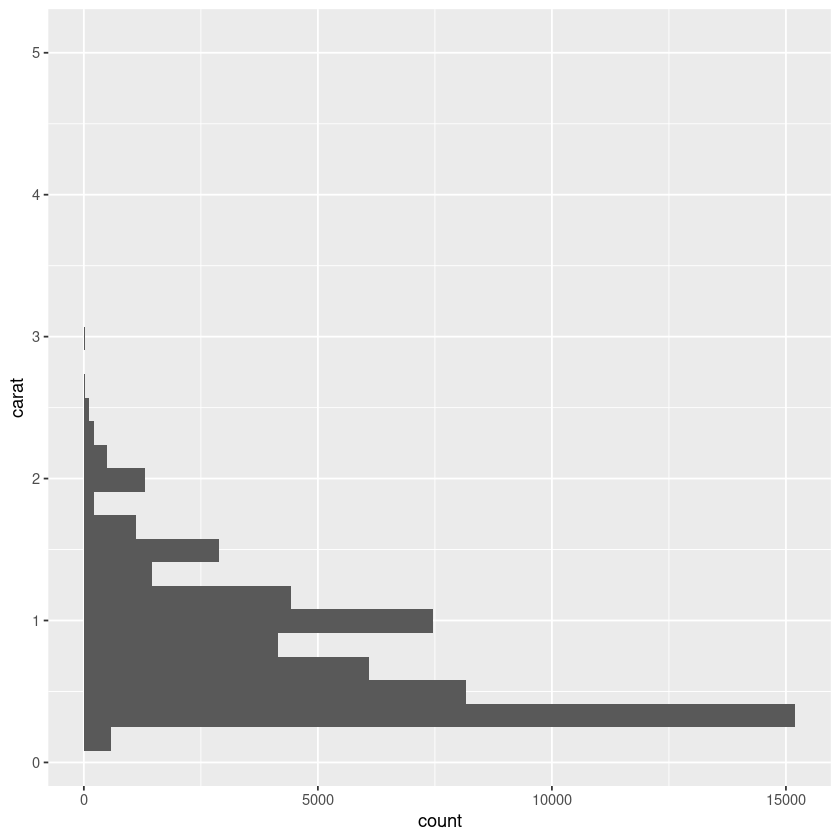

In [12]:
# flip axes

ggplot(diamonds, aes(y = carat)) +
  geom_histogram()


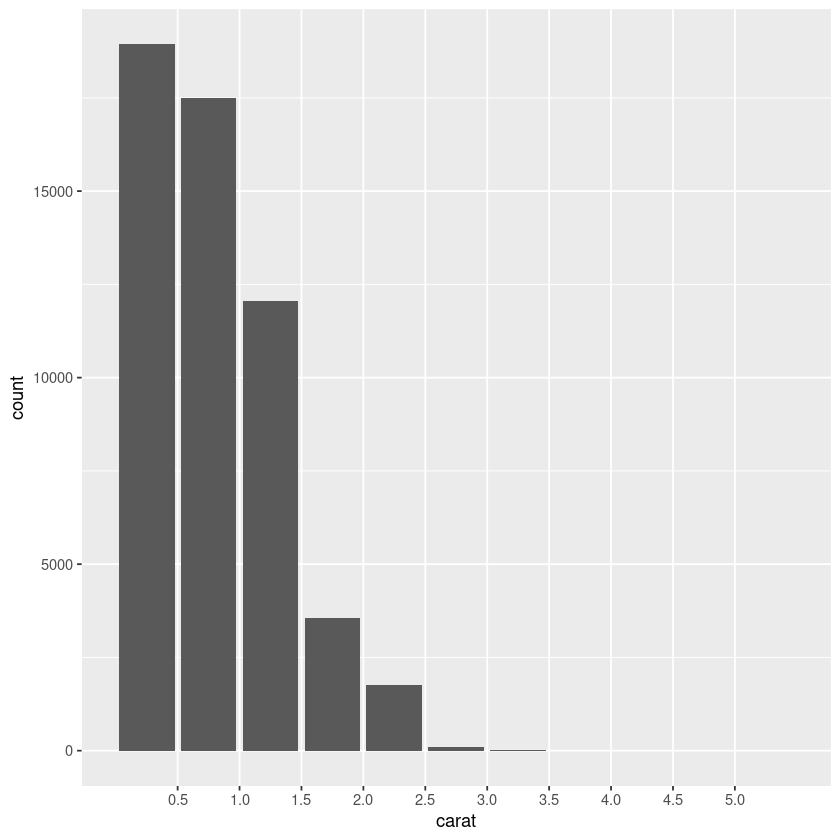

In [13]:
# for histograms with tick marks between each bin, use `geom_bar` with `scale_x_binned`

ggplot(diamonds, aes(carat)) +
  geom_bar() +
  scale_x_binned()

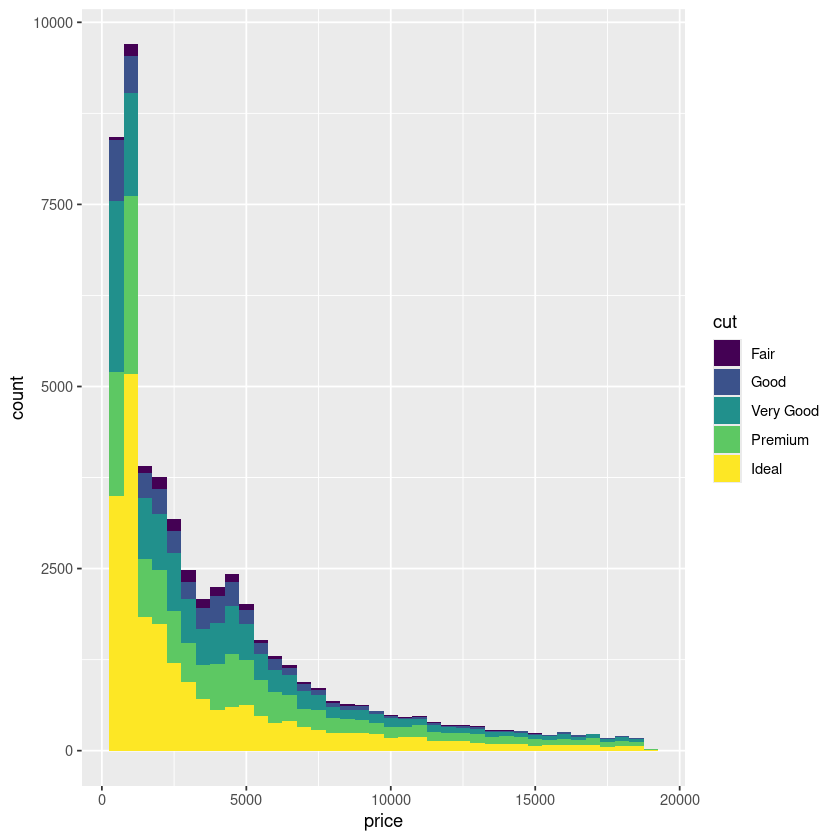

In [14]:
# color coding & stacking histograms

ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

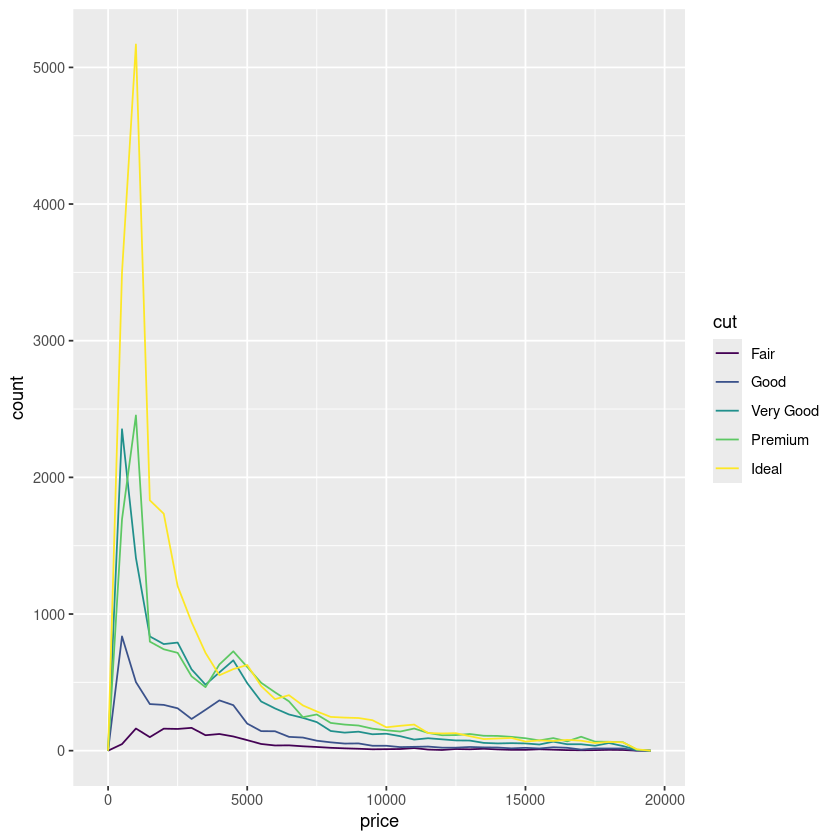

In [15]:
# sometimes instead of stacking histograms, it's easier to compare frequency polygons

ggplot(diamonds, aes(price, colour = cut)) +
  geom_freqpoly(binwidth = 500)


### Boxplots

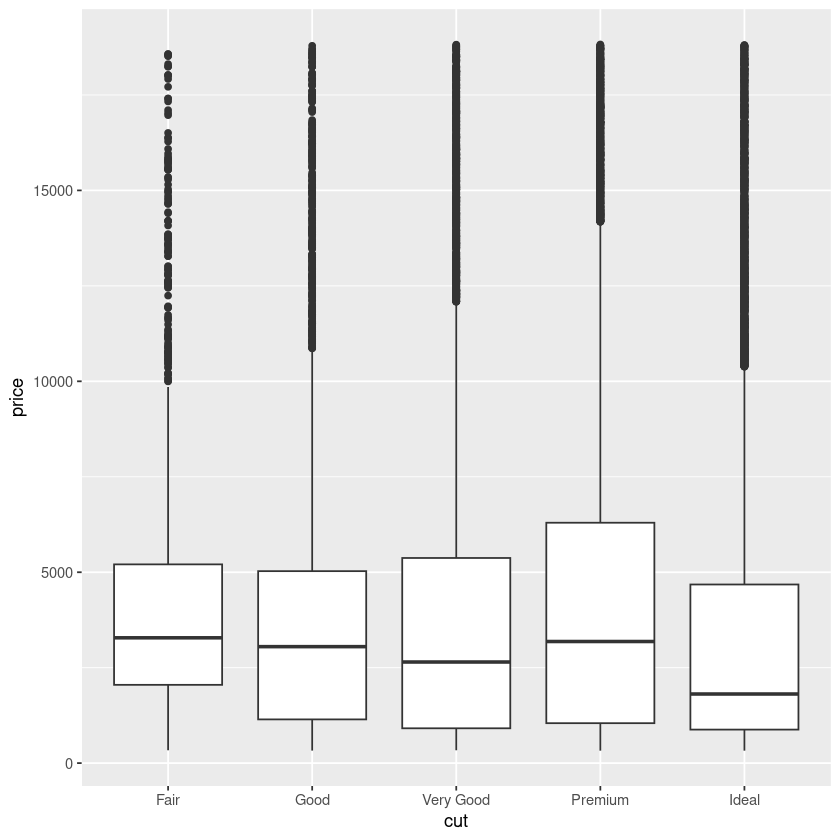

In [16]:
ggplot(diamonds, aes(x=cut, y=price)) +
    geom_boxplot()

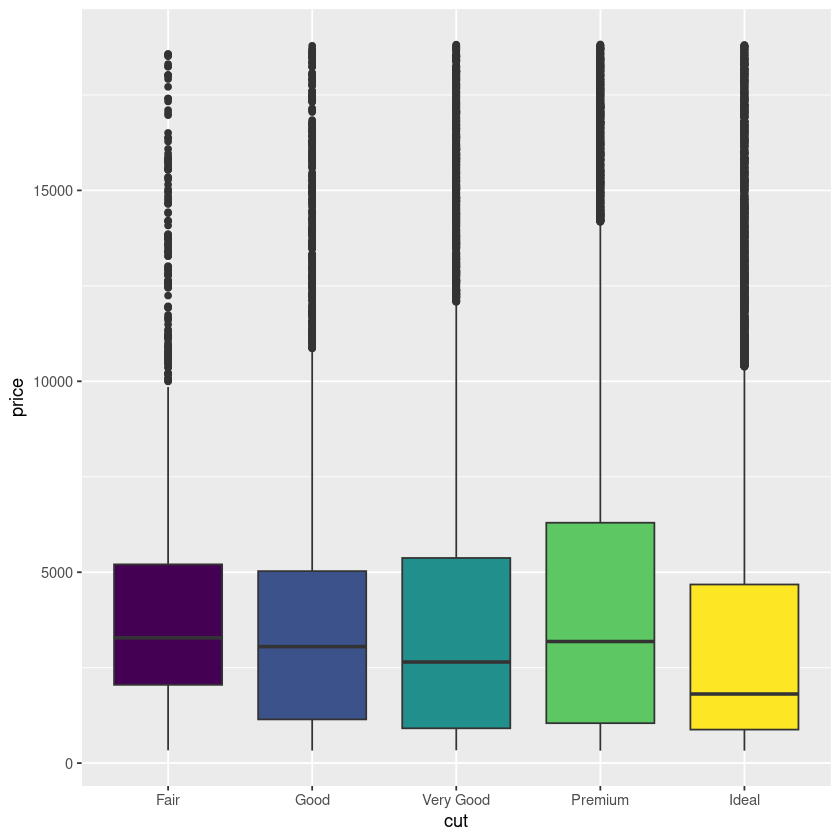

In [17]:
ggplot(diamonds, aes(x=cut, y=price, fill = cut)) +
    geom_boxplot() + theme(legend.position="none")

In [18]:
# highlight a category

# prepare data
data <- mutate(diamonds, type=ifelse(cut=="Premium","Highlighted","Normal"))
head(data)

carat,cut,color,clarity,depth,table,price,x,y,z,type
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,Normal
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,Highlighted
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,Normal
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,Highlighted
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,Normal
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,Normal


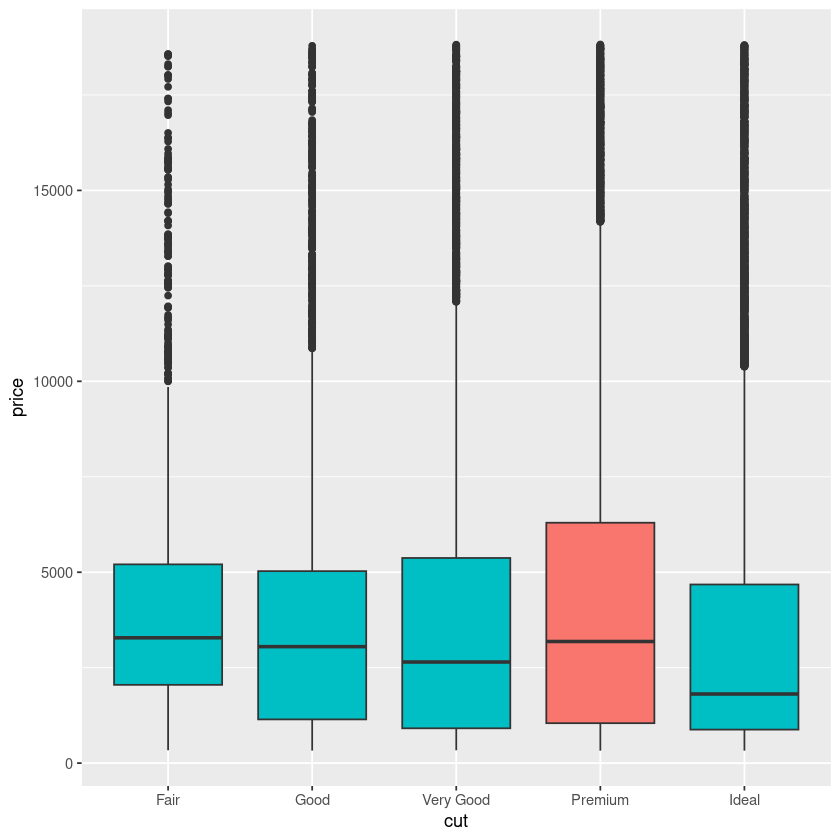

In [19]:
ggplot(data, aes(x=cut, y=price, fill = type)) +
    geom_boxplot() + theme(legend.position="none")

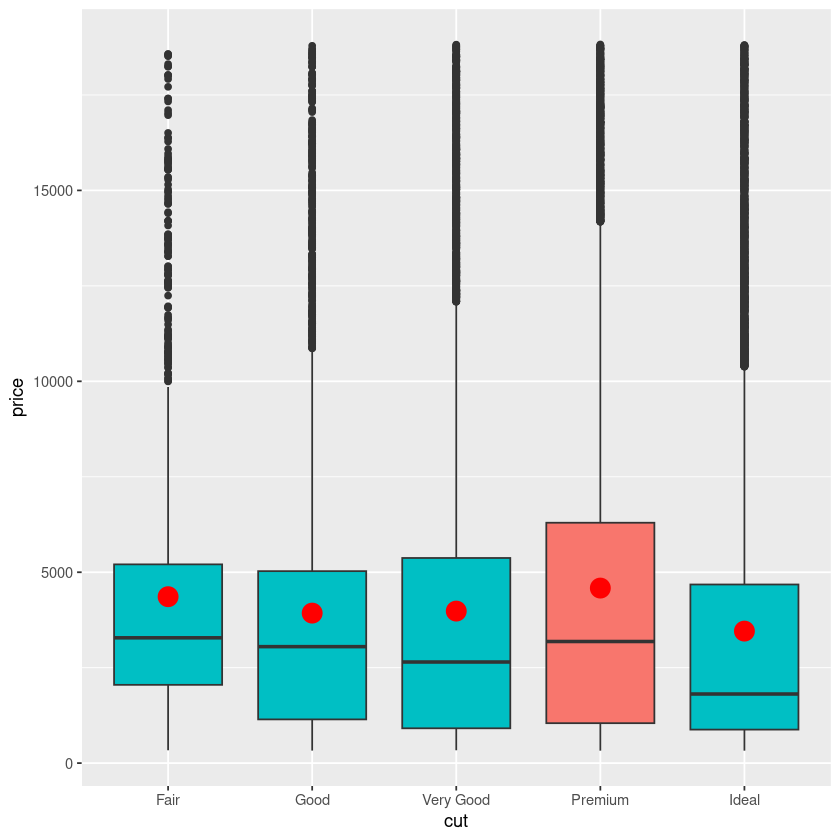

In [20]:
# adding the mean point

ggplot(data, aes(x=cut, y=price, fill = type)) +
    geom_boxplot() + theme(legend.position="none") +
    stat_summary(fun=mean, geom="point", shape=20, size=8, color="red")

##### Grouped Boxplot

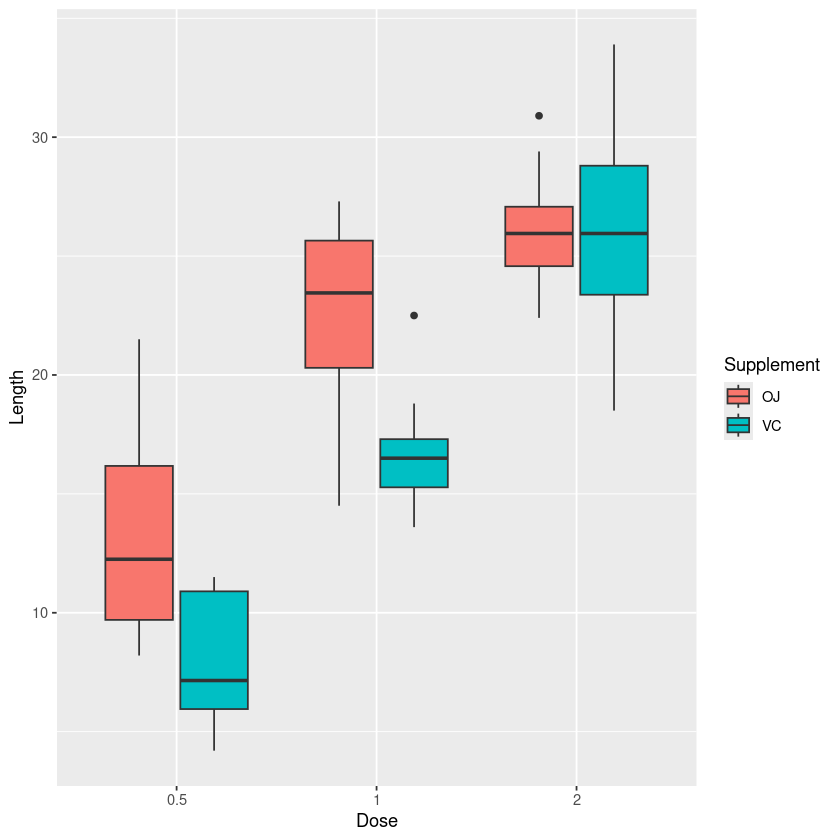

In [21]:
# grouped boxplot
# the effect of vitamin C on tooth growth in guinea pigs; each pig received one of three doses of vitamin C, through 
# one of two delivery methods (orange juice or ascorbic acid)

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + labs(x = "Dose", y = "Length", fill = "Supplement")

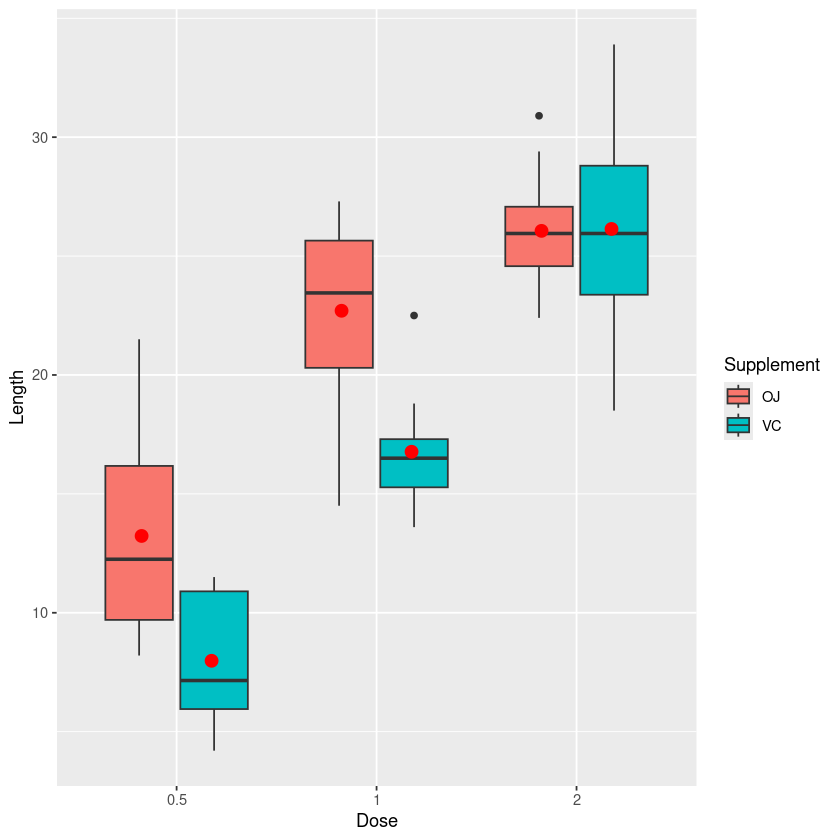

In [22]:
# with mean points

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + 
    stat_summary(fun=mean, aes(group = supp), geom="point", 
                 position=position_dodge(width=0.7), shape=20, size=5, color="red", show.legend = FALSE) +
    labs(x = "Dose", y = "Length", fill = "Supplement")

##### Faceting

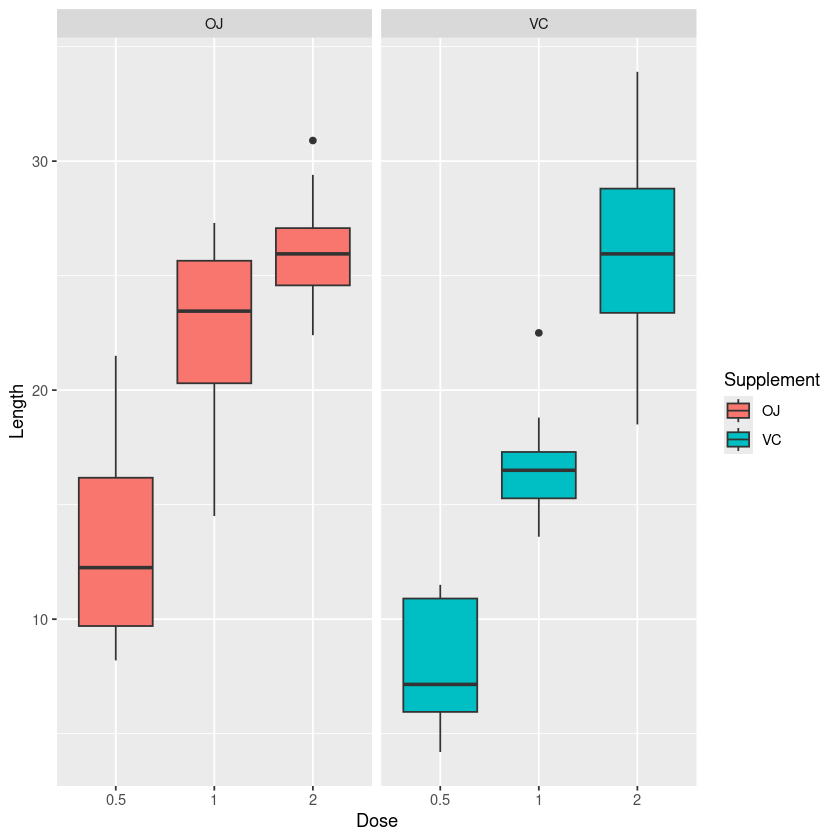

In [23]:
# faceting; one box per delivery method

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + facet_wrap(~supp) +
    labs(x = "Dose", y = "Length", fill = "Supplement")


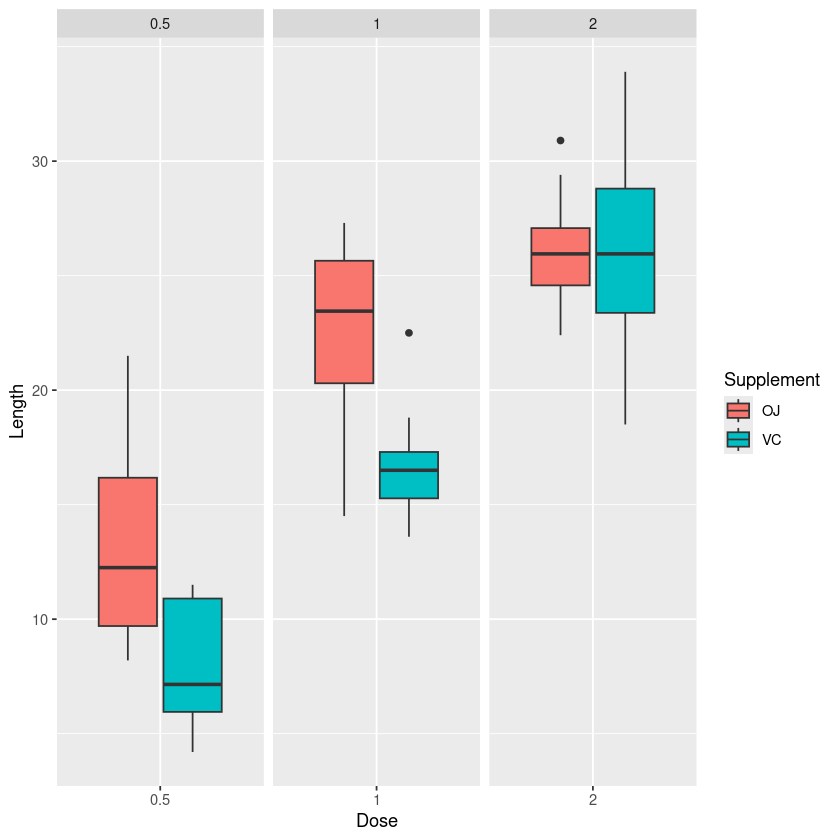

In [24]:
# faceting; one box per dose type

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + facet_wrap(~as.factor(dose), scale="free_x") +
    labs(x = "Dose", y = "Length", fill = "Supplement")

##### With jitter

,name,value
,<chr>,<dbl>
1,A,0.7215433
2,A,13.1808221
3,A,7.5353201
4,A,2.3784486
5,A,12.3588172
6,A,12.5124685


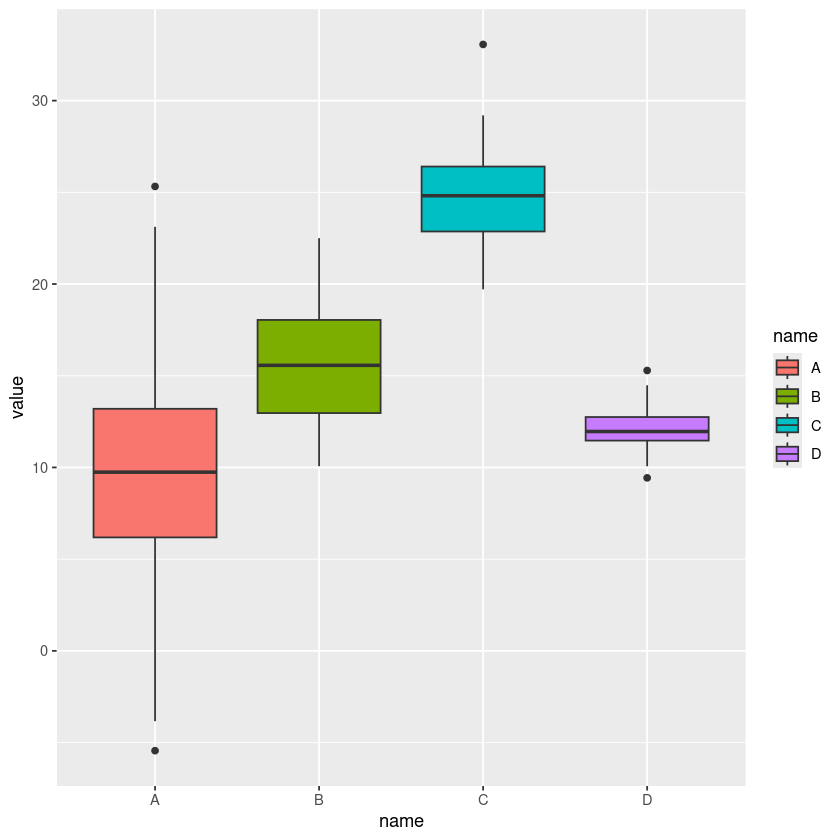

In [25]:
# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)
head(data)

# plot basic boxplot
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_boxplot() 

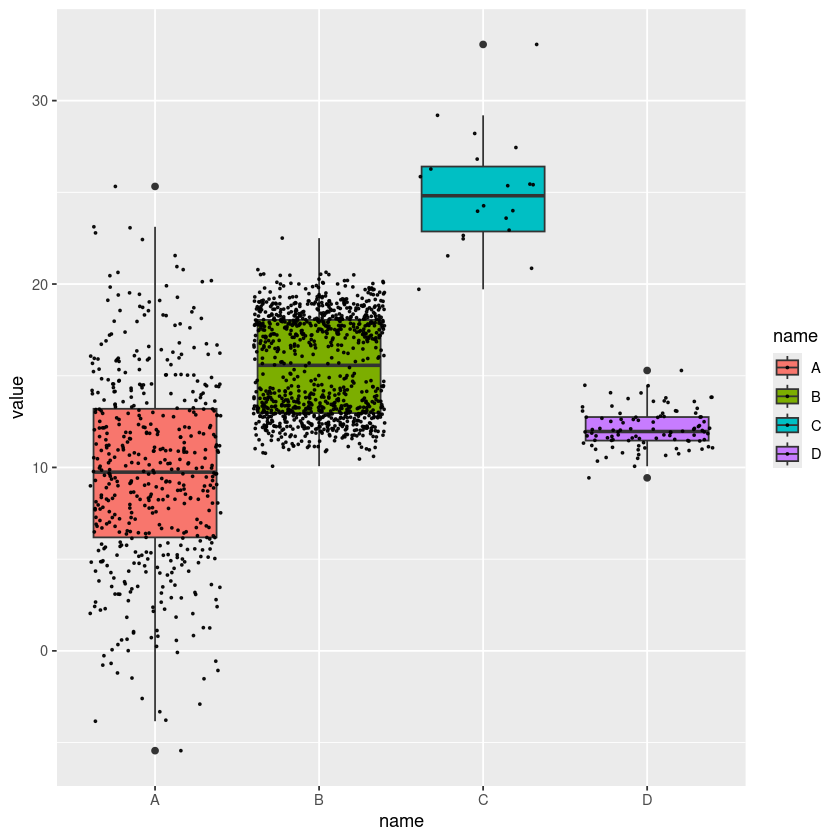

In [26]:
# plot boxplot with jitter
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.4, alpha=0.9)

### Violin Plots

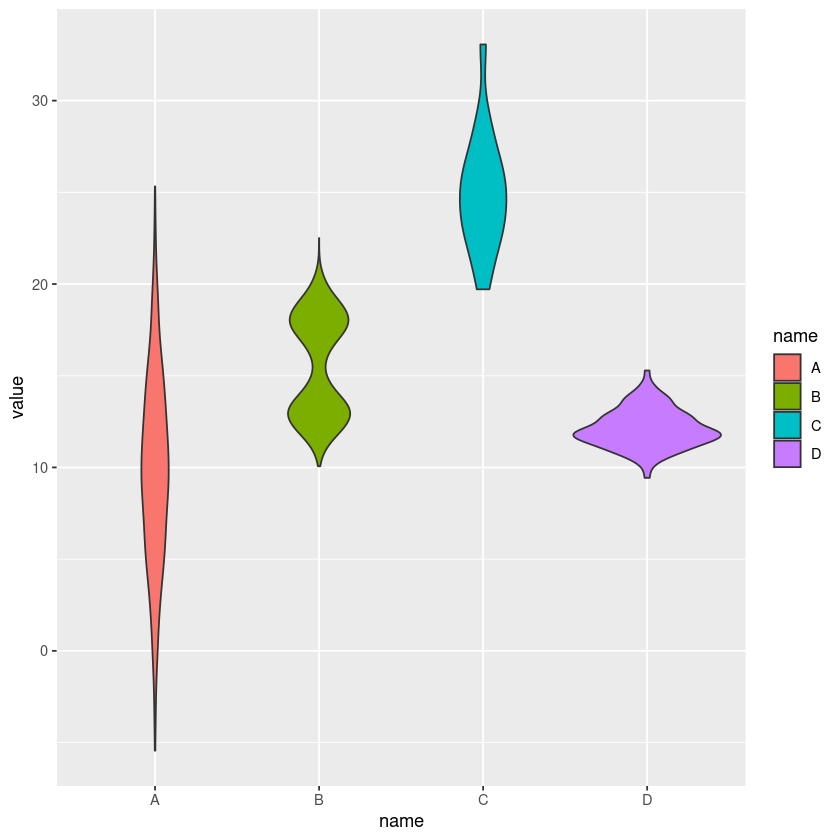

In [27]:
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_violin() 

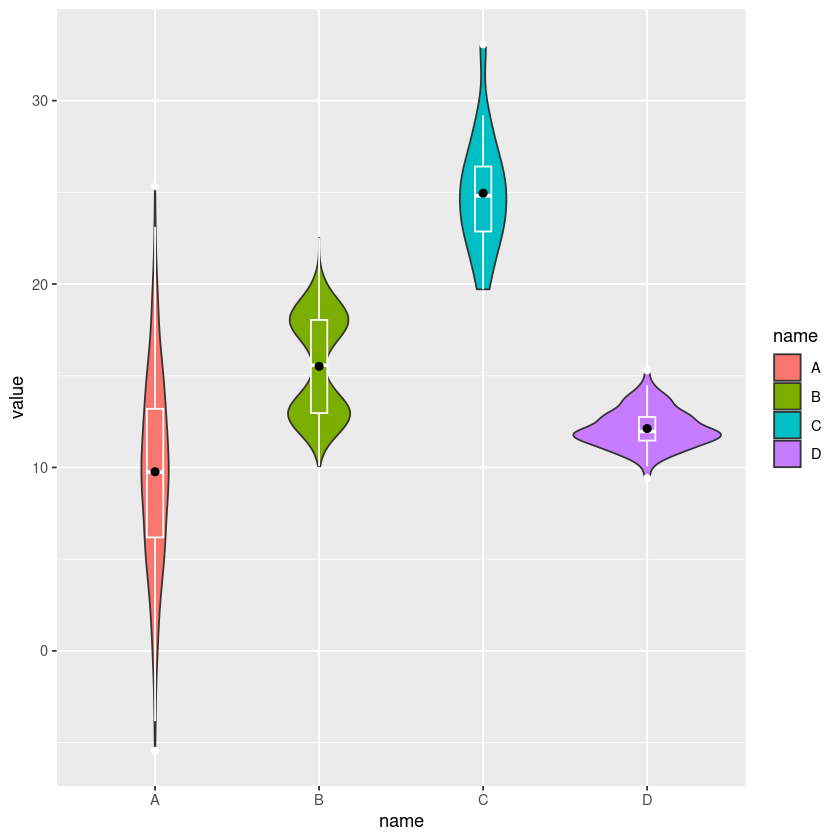

In [28]:
# overlap boxplot and violins

ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_violin() + geom_boxplot(width=0.1, color="white", show.legend = FALSE) +
    stat_summary(fun=mean, geom="point", shape=20, size=3, color="black", show.legend = FALSE)

## Annotation

### Point labels

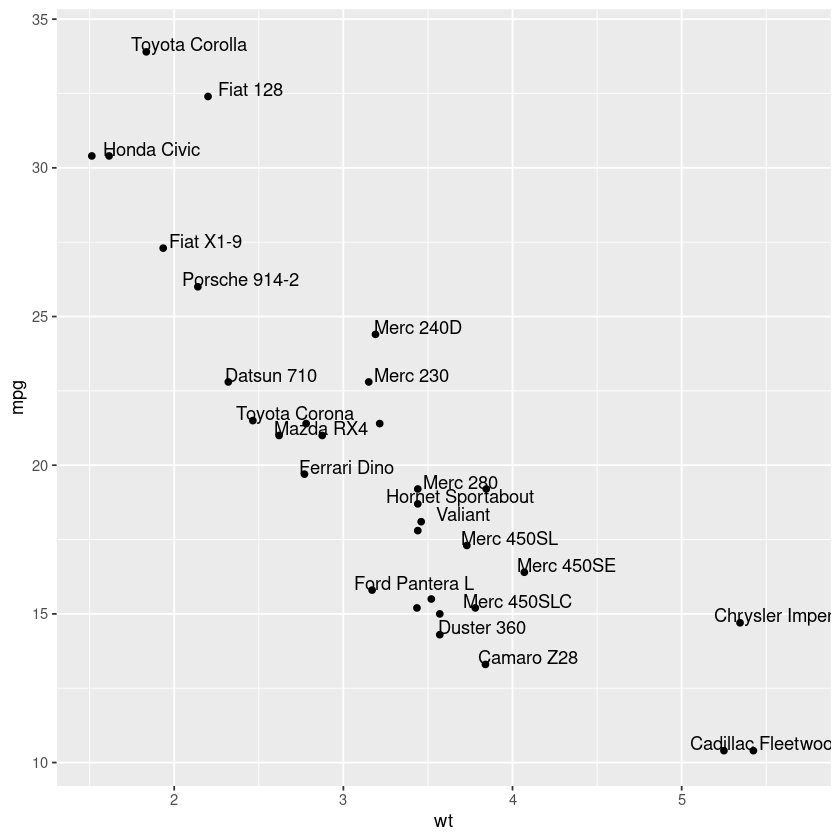

In [29]:
# using geom_text() to apply text labels to points

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_text(
      label=rownames(mtcars),
      nudge_x = 0.25, nudge_y = 0.25, 
      check_overlap = T
  )

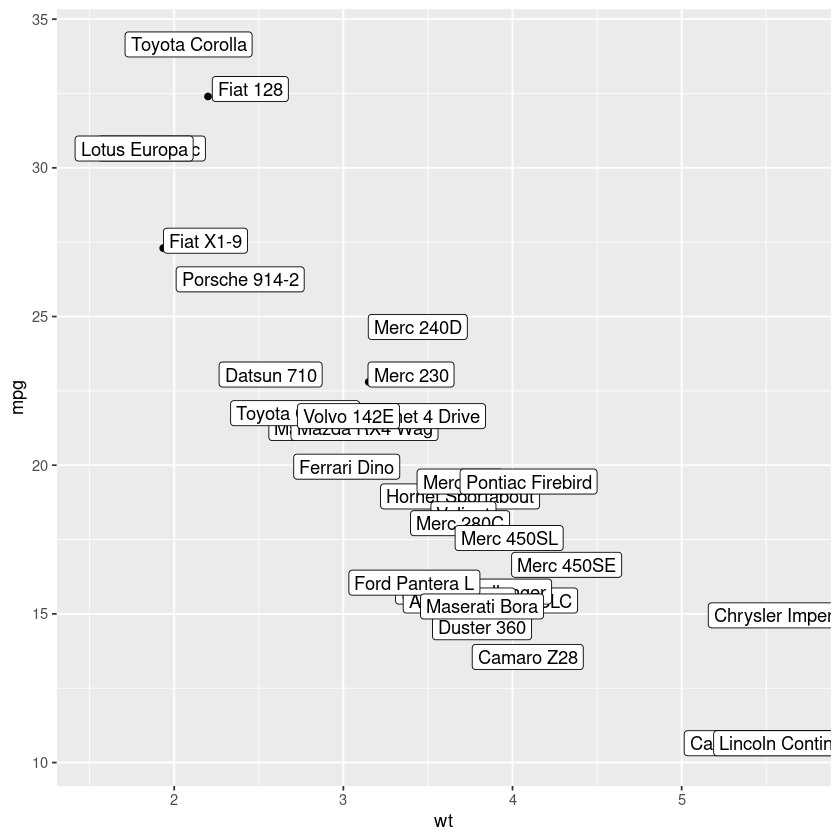

In [30]:
# using geom_label() to apply text labels to points

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_label(
      label=rownames(mtcars),
      nudge_x = 0.25, nudge_y = 0.25
  )

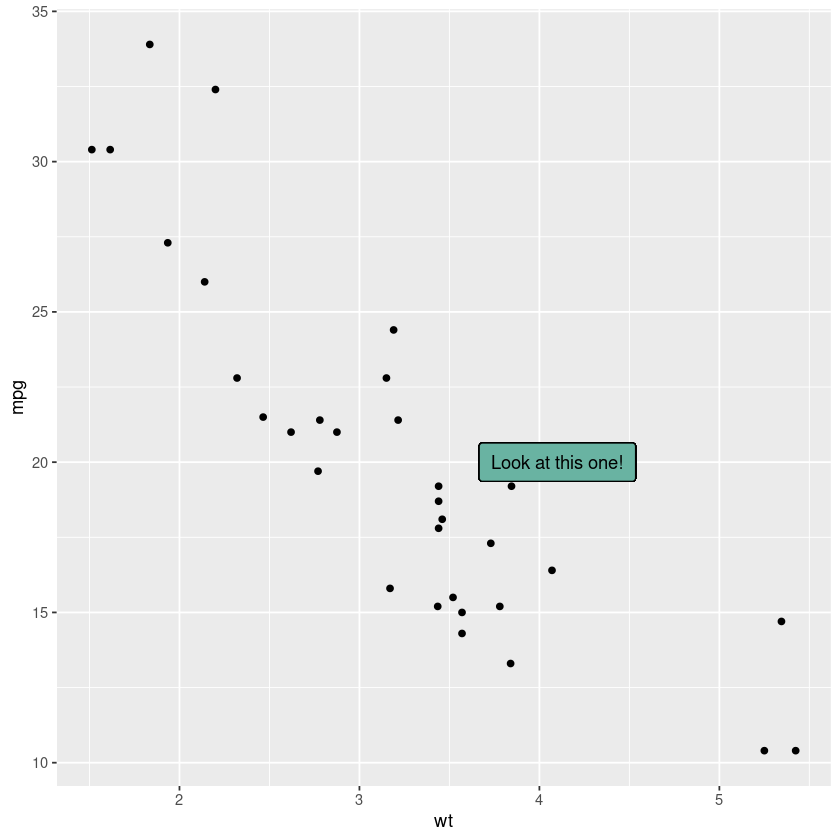

In [31]:
# add one annotation

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + # Show dots
  geom_label(
    label="Look at this one!", 
    x=4.1,
    y=20,
    label.padding = unit(0.55, "lines"), # Rectangle size around label
    label.size = 0.35,
    color = "black",
    fill="#69b3a2"
  )

### Shapes

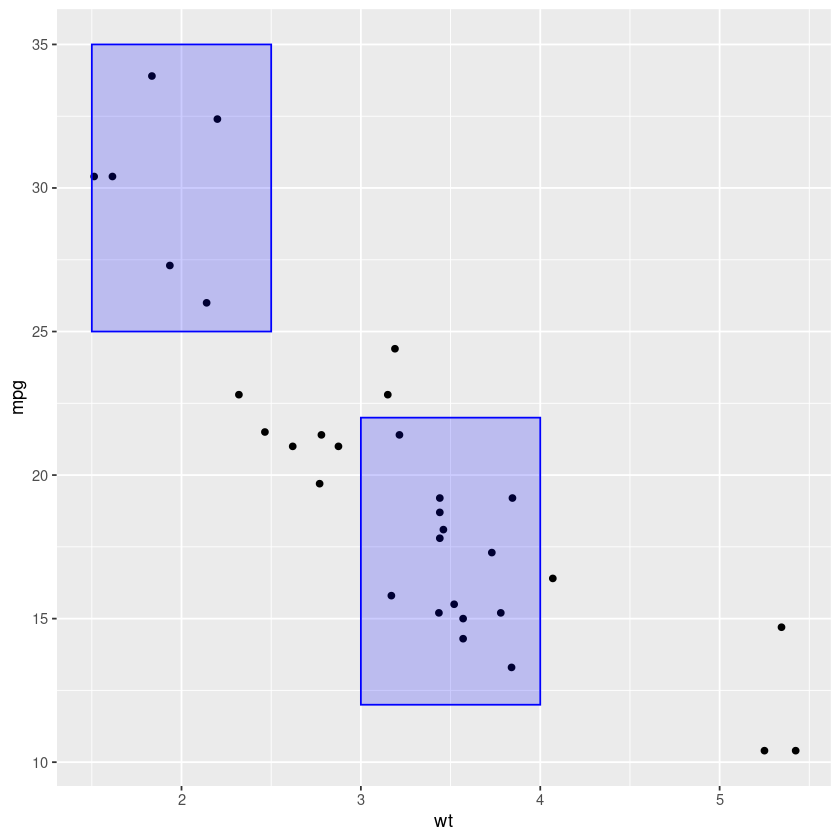

In [32]:
# rectangles

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("rect", xmin=c(1.5,3), xmax=c(2.5,4), ymin=c(25,12) , ymax=c(35,22), alpha=0.2, 
             color="blue", fill="blue")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


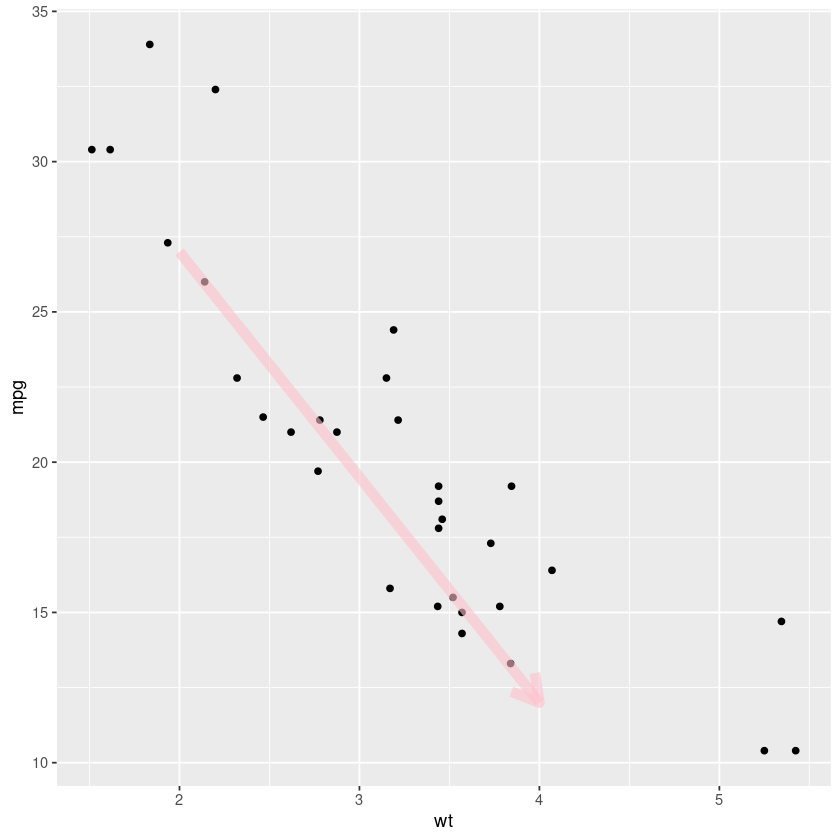

In [33]:
# segments/arrows

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("segment", x = 2, xend = 4, y = 27, yend = 12, colour = "pink", size=3, alpha=0.6, arrow=arrow())

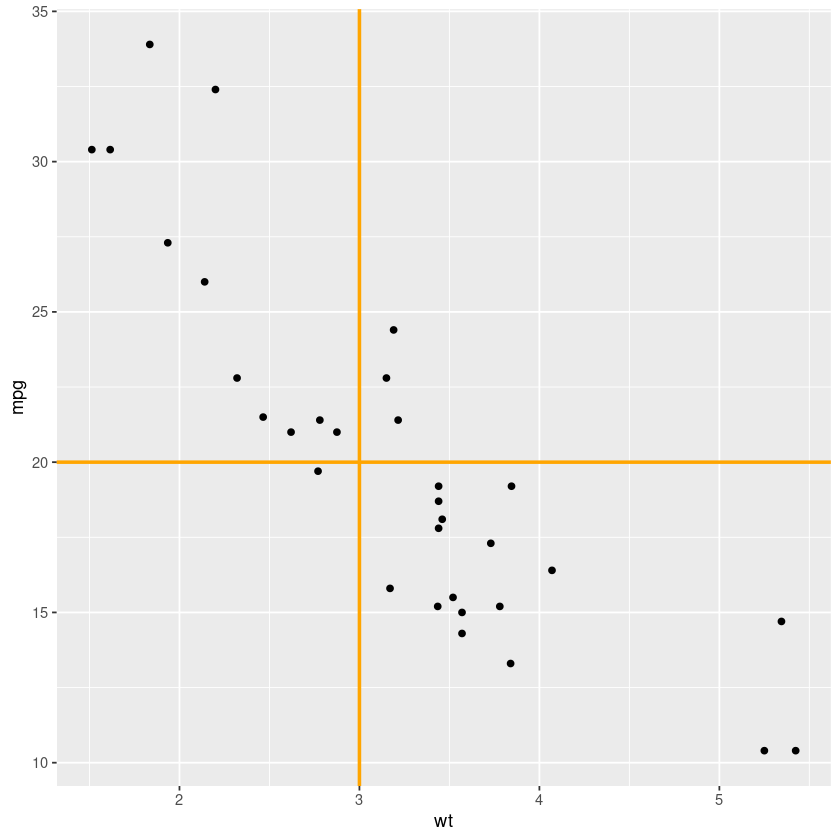

In [34]:
# gridlines

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    # horizontal
    geom_hline(yintercept=20, color="orange", size=1) + 
    # vertical
    geom_vline(xintercept=3, color="orange", size=1)

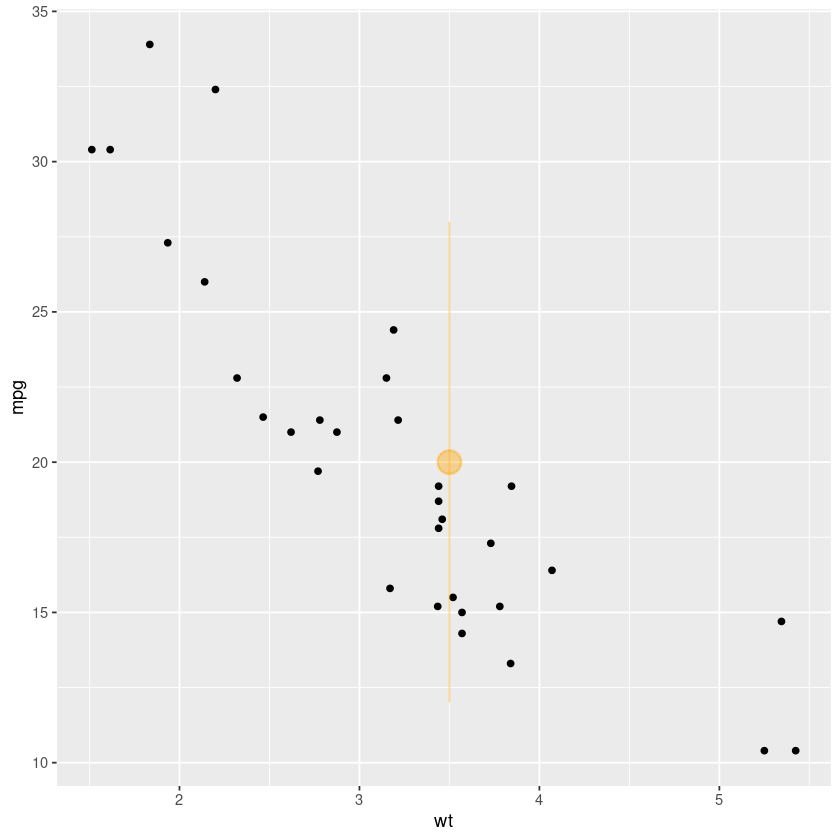

In [35]:
# point w/ range
ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("pointrange", x = 3.5, y = 20, ymin = 12, ymax = 28,colour = "orange", size = 1.5, alpha=0.4)


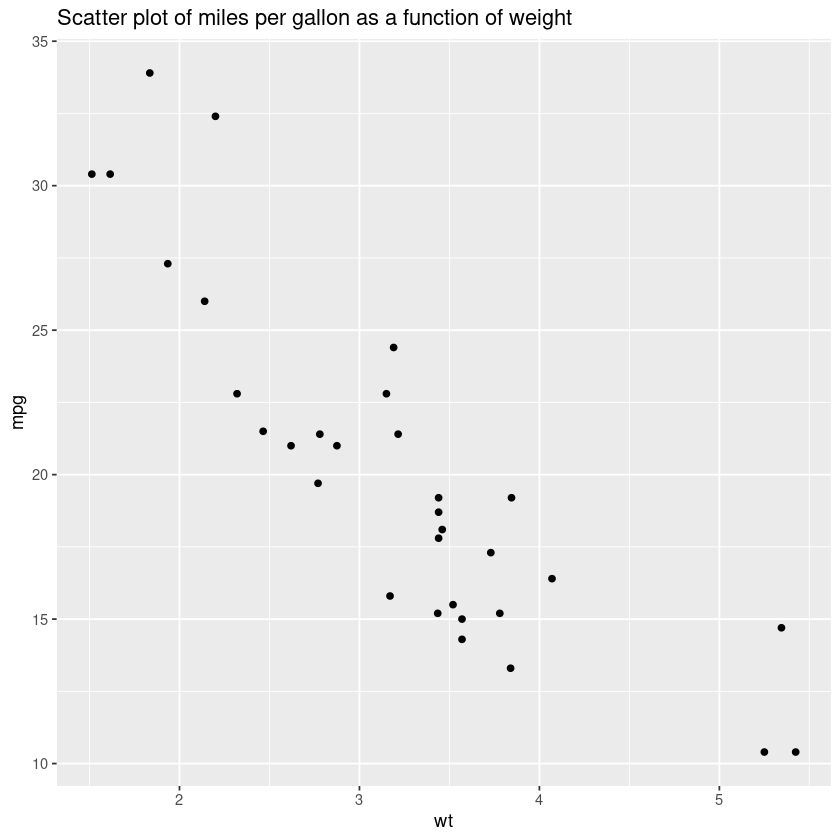

In [36]:
# title manipulation

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle("Scatter plot of miles per gallon as a function of weight")

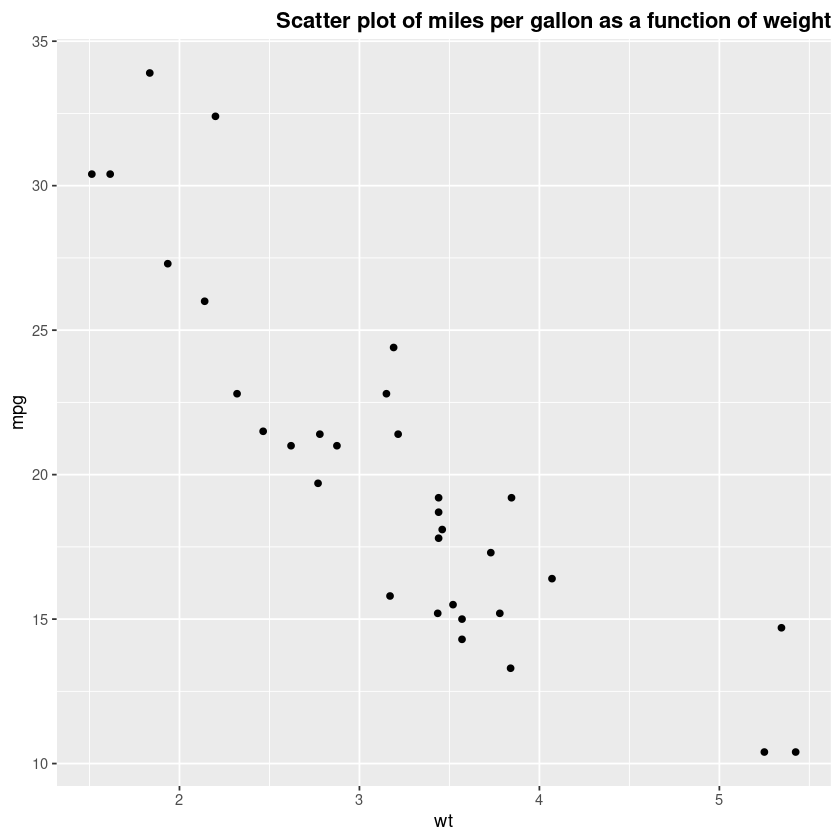

In [37]:
# adjusting title with theme()

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle("Scatter plot of miles per gallon as a function of weight") +
    theme(plot.title=element_text( hjust=1, vjust=0.5, face='bold'))

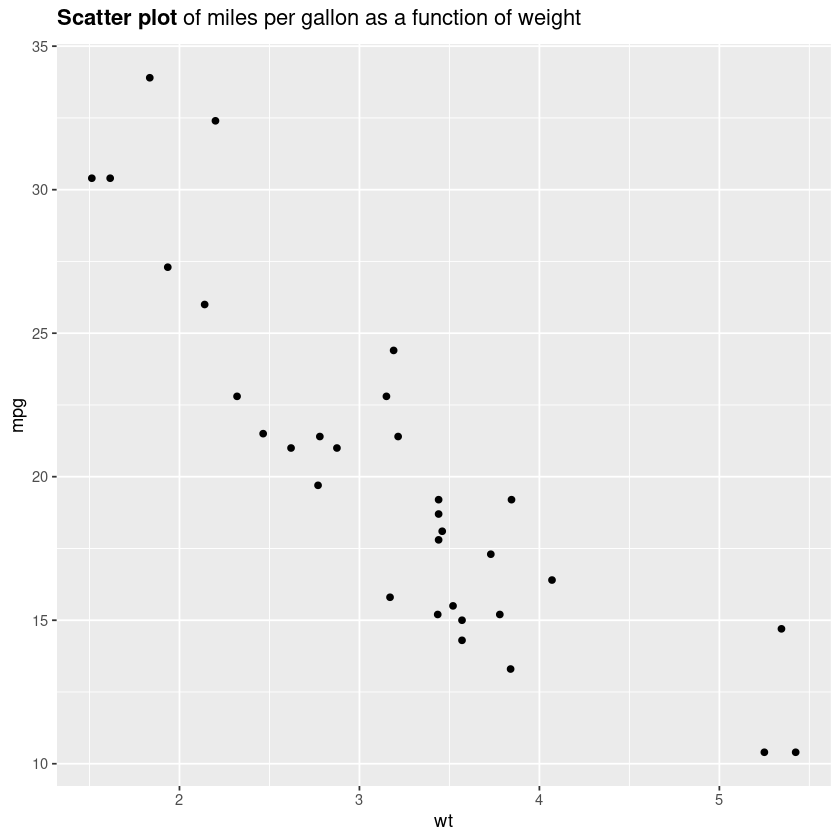

In [38]:
# customizing a word

my_title <- expression(paste(italic(bold("Scatter plot"))," of miles per gallon as a function of weight"))

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle(my_title)

## Questions

* You assign 100 UCB students to 5 groups, and each group receives a unique variation of an exam from the same class. You want to visualize your data to see if there might be a particular variation that has a higher rate of success. What plot might you use?


* A series of hourly temperatures were measured throughout the day in degrees Fahrenheit. You want to visualize some simple summary statistics to get a basic understanding of the underlying distribution of temperature. What plot might you use?


* You receive data over the next 3 months for both temperature and humidity, and want to understand the relationship between the two. What plot might you use to visualize the relationship?



* You receive traffic data for randomly sampled days throughout the year from the San Francisco International Airport. You want to calculate the probabilty that on any particular day, there are $X$ amount of people that arrive at the airport per hour. What plot might you use to visualize this?



# Mean, SD, and SEM

**Mean**

The mean, or more explicitly the *sample* mean, $\bar{x}_n$ is a computation performed on a sample size of $n$ from a distribution of a random variable $X$.

**Expected Value**

Example:

Let $X$ represent the outcome of a roll of an unbiased six-sided die. Then $E[X] =  ? $.

Supposed in a sequence of 10 rolls, the outcomes are 5,2,6,2,2,1,2,3,6,1. Then $\bar{x}_{10} = \frac{5+2+6+2+2+1+2+3+6+1}{10} = 3$. 

As $N\to\infty$, $\bar{x}_N \to E[X]$. 

**Variance**

Calculated as: $\sigma^2 = \frac{\sum(x-\mu)^2}{n}$. The *(unbiased) sample variance* is $\hat{\sigma}^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

**Standard Deviation**

Calculated as: $\sigma = \sqrt{\frac{\sum(x-\mu)^2}{n}}$. The *(unbiased) sample standard deviation* is $\hat{\sigma} = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$

**Standard Error of the Mean (SEM)**

This is estimated as: $SEM = SD(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}}$ (the standard deviation of a sample normalized by the square root of the sample size).

In [41]:
# Example:

data <- iris %>% select(Species, Sepal.Length) 

In [42]:
# calculates mean, sd, sem 
my_sum <- data %>%
  group_by(Species) %>%
  summarise( 
    n=n(),
    mean=mean(Sepal.Length),
    sd=sd(Sepal.Length)
  ) %>%
  mutate( sem=sd/sqrt(n))  

my_sum

Species,n,mean,sd,sem
<fct>,<int>,<dbl>,<dbl>,<dbl>
setosa,50,5.006,0.3524897,0.04984957
versicolor,50,5.936,0.5161711,0.07299762
virginica,50,6.588,0.6358796,0.08992695


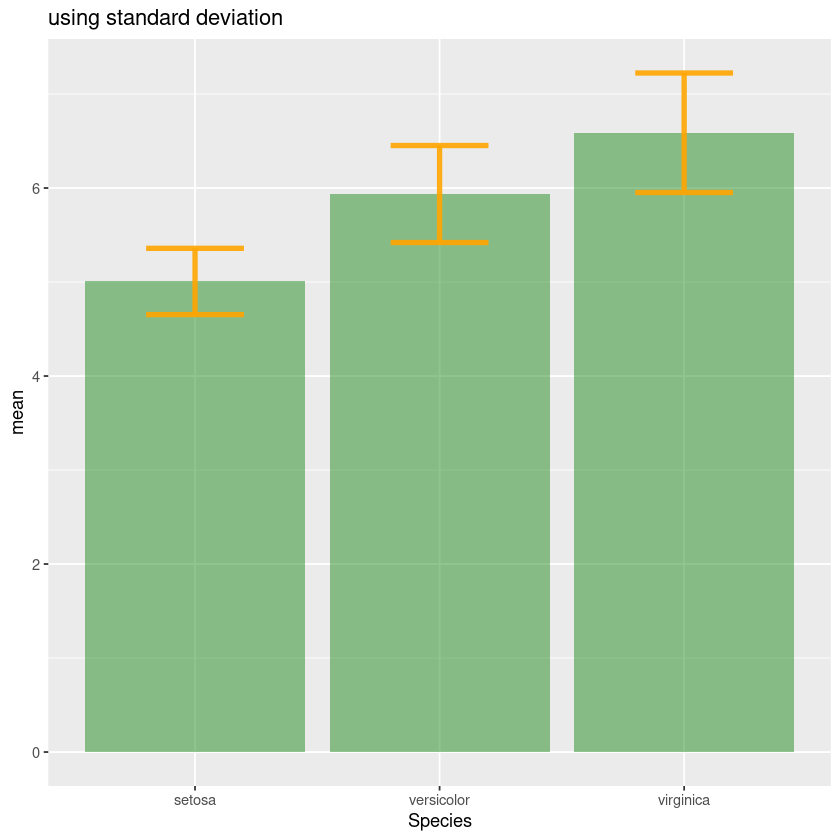

In [43]:
# using ggplot to add error bars to bar plots

# using standard deviation as an error measurement
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard deviation")

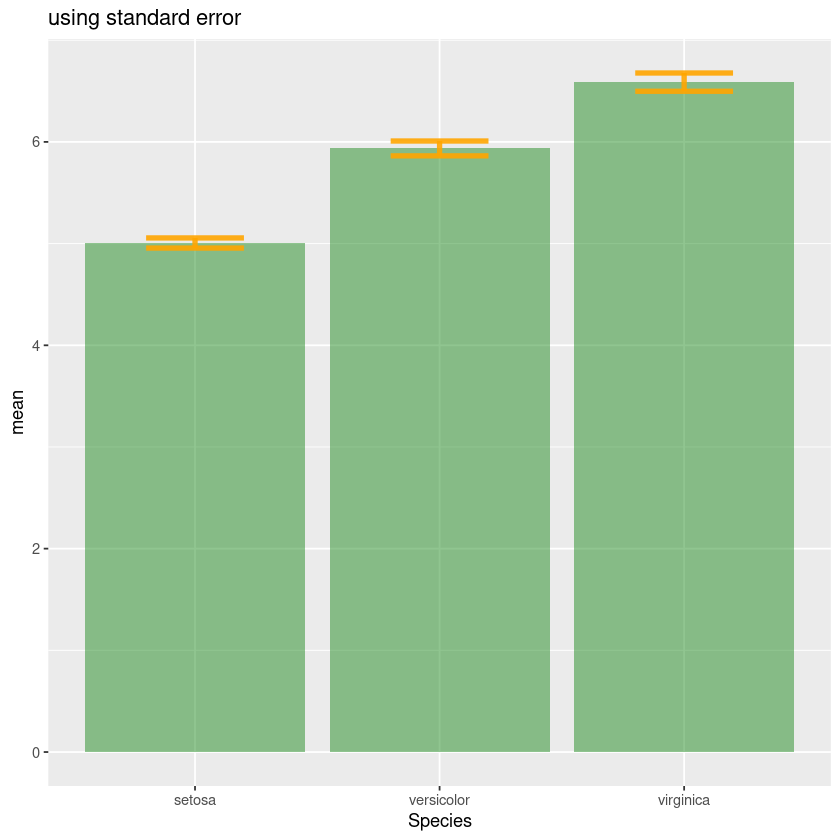

In [44]:
# using standard error as an error measurement
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sem, ymax=mean+sem), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard error")

## Assignment

##### Practice writing functions

1. Create a function that calculates the sample mean of a vector. Run it on `x` and do a sanity check with the `mean()` function. 

In [45]:
x <- rnorm(5, 25, 5)

2. Create a function that calculates the sample standard deviation of a vector. Run it on `x` and do a sanity check with the `sd()` function.

3. Create a function that calculates the standard error of the mean of a vector. Run it on `x`. 

##### Understanding SD and SEM

In [46]:
# set up for questions 4 and 5
# create two more vectors of varying sample sizes from the same distribution as `x`
y <- rnorm(50, 25, 5)
z <- rnorm(1000, 25, 5)

#merge the vectors into a data.frame
data <- data.frame(sample=rep(c("x", "y", "z"), times=c(5,50,1000)), obs = c(x,y,z))

4. We want to compare the means of each of the 3 vectors, and account for error. Using the example from lab as a reference, construct a table with all of the necessary summary statistics.

5. Plot bar plots of the means of each vector. Add error bars using standard deviation. Knowing that our samples are taken from a distribution with mean=25, and sd=5, what trend do you notice in the sample standard deviation across the vectors of samples? Specifically reference how the trend correlates with the vectors of samples. 

6. Now plot error bars using the standard error of the means. What trend do you notice in the sample SEM across the vectors of samples? Specifically reference how the trend correlates with the vectors of samples.